# Prediction of Bank New Product Uptake           (Oyinlola Adewale)


In [1]:
#import python libraries for data manipulation and visualization
import pandas as pd
import numpy as np

#import other libraries....

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# import datatime for datetime manipulations
from datetime import datetime as dt

In [2]:
# load the data
data = pd.read_csv(r'C:\Users\dell\Desktop\MACHINE LEARNING\bank.csv',sep=';', header=0)

In [3]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [5]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [6]:
#inspect the data

data.shape

(4521, 17)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [8]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [9]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

 From the above we can say the data has no missing value.

In [10]:
# checking for unique valeus in the column for prediction

data.job.unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [11]:
# unique outcome of phone calls
data['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [12]:
data['contact'].unique()

array(['cellular', 'unknown', 'telephone'], dtype=object)

In [13]:
data.y.unique()

array(['no', 'yes'], dtype=object)

In [14]:
data.education.unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [15]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


# Data Visualization

Text(0.5, 1.0, 'How Existing Loans affect Customer Decision')

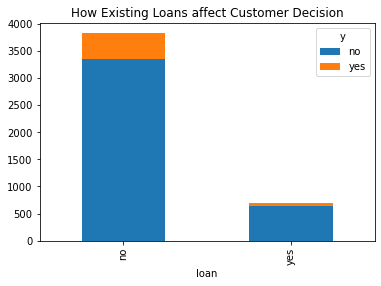

In [16]:
y_job_pivot = pd.crosstab(data.loan,data.y)
y_job_pivot.plot.bar(stacked=True)
plt.title('How Existing Loans affect Customer Decision')


people without existing loan signify interest in subscribing for the new product

Text(0, 0.5, 'Count Education')

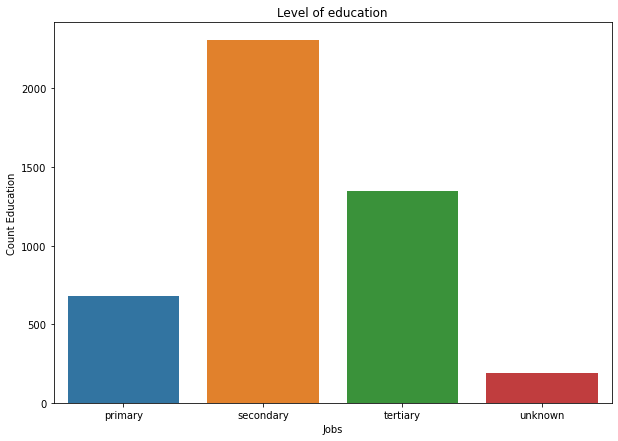

In [17]:
# customers level of education

plt.figure(figsize=(10,7))
plt.title('Level of education')
sns.countplot(x='education', data=data)

plt.xlabel('Jobs')
plt.ylabel('Count Education')


Majority of the people that signify interest in the new product have secondary education

In [18]:
data.job.value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

Text(0.5, 1.0, 'How Jobs affect Customer Purchase')

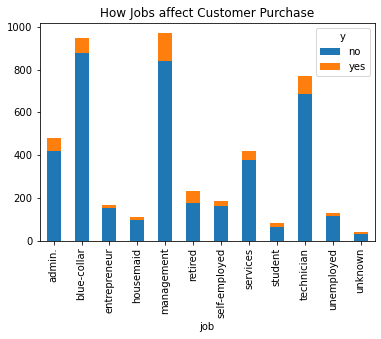

In [19]:
y_job_pivot = pd.crosstab(data.job,data.y)
y_job_pivot.plot.bar(stacked=True)
plt.title('How Jobs affect Customer Purchase')

         ###comment on result
'''Those who are retired or have blue-collar jobs, or with jobs in management, admin and technicians have subscribed. 
This makes sense as out of the occupations give, these are the well paying jobs and the jobs that are more stable '''

In [20]:
data.poutcome.value_counts()

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

Text(0, 0.5, 'Count phone call')

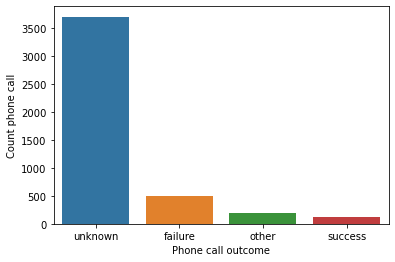

In [21]:
# phone conversation end in a success
sns.countplot(x='poutcome', data=data)
plt.xlabel('Phone call outcome')
plt.ylabel('Count phone call')

Here, the outcome of phone conversation shows majority of the customers not been certain in their decision to subcribe for the new product

Text(0, 0.5, 'Count of responses')

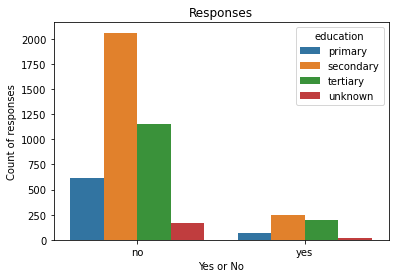

In [22]:

# Does education have a role to play in type of job


plt.title('Responses')
sns.countplot(x='y', data=data, hue='education')
plt.xlabel('Yes or No')
plt.ylabel('Count of responses')

'using a histogram, we can see that majority of the answers came from people aged 19-49. \nIf we look at this on a bar chart, we would see that there is more concentration between age 30-38.'

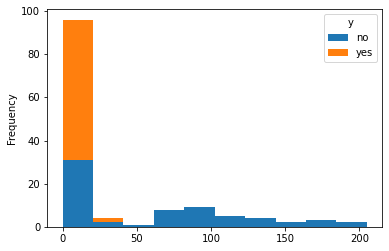

In [23]:
y_job_pivot = pd.crosstab(data.age,data.y)
y_job_pivot.plot.hist(stacked=True, rot=0)

'''using a histogram, we can see that majority of the answers came from people aged 19-49. 
If we look at this on a bar chart, we would see that there is more concentration between age 30-38.''' 

" It makes sense that majority of the 'yes' comes from people between 30-38 as these are people who earn more than those\nbetween 19 and 29 but also have less responsibilities than those aged 40-60, and have more stable earnings than those who ar\nretired.\nTherefore, they are likely to be the age group able to spare some cash for a deposite subscription."

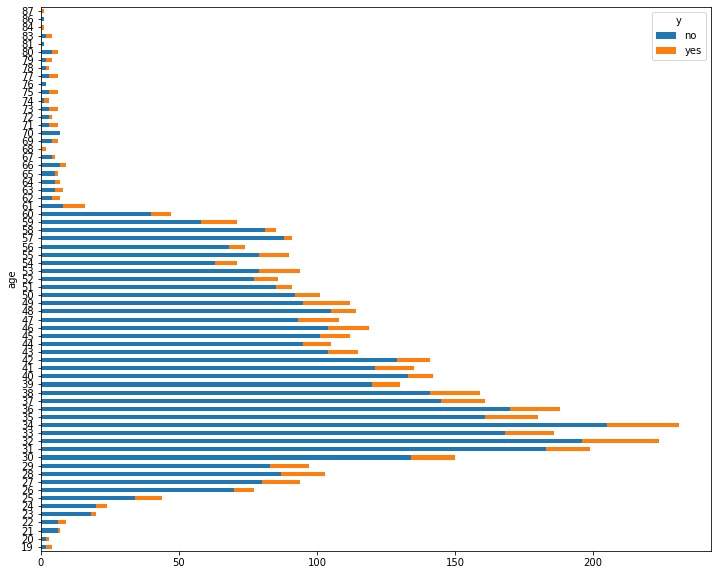

In [24]:
y_job_pivot.plot.barh(stacked=True, rot=0, figsize = (12,10))
''' It makes sense that majority of the 'yes' comes from people between 30-38 as these are people who earn more than those
between 19 and 29 but also have less responsibilities than those aged 40-60, and have more stable earnings than those who ar
retired.
Therefore, they are likely to be the age group able to spare some cash for a deposite subscription.'''

# Summary of Findings


1. Those who are retired or have blue-collar jobs, or with jobs in management, admin and technicians have subscribed. 
2. people without loans have a higher yes than those with loans
3. using a histogram, we can see that majority of the answers came from people aged 19-49. If we look at this on a bar chart, we would see that there is more concentration between age 30-38.
4. It makes sense that majority of the 'yes' comes from people between 30-38 as these people earn more than those between
19 and 29 but also have less responsibilities than those aged 40-60, and have more stable earnings than those who are retired.
Therefore, they are likely to be the age group able to spare some cash for a deposite subscription

<AxesSubplot:xlabel='age', ylabel='balance'>

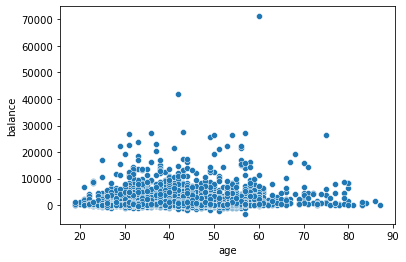

In [25]:
# relationship between age and balance using scatterplot

sns.scatterplot(x=data['age'], y=data ['balance'])

Relationship between balance and Age shows that majority of the bank customers have their balance below 10,000 while few customers have between 20,000 and 40,000. only 2 customers hasAbove 40,000.
Also customers in Age category 70 to 90 are few transacting with the bank compare to Age 20 to 50

Text(0.5, 1.0, 'Correlation between Columns')

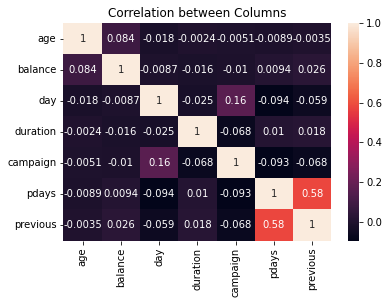

In [26]:
corel = data.corr()
sns.heatmap(corel,annot=True)
plt.title('Correlation between Columns')


correlation between columns shows there is a weak relationship between the balance and the outcome and this also show in the duration of calls and it outcome

### ONE - HOT ENCODING

In [27]:
data.y.replace('yes', 1, inplace=True)
data.y.replace('no', 0, inplace=True)

In [28]:
categorical = ['job', 'marital', 'education','default','housing','loan','contact','month','poutcome' ]

In [29]:
categories_dumies = pd.get_dummies(data[categorical])


In [30]:
categories_dumies.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [31]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


In [32]:
# Use concat to merge the one-Hot encode with the real data table
data = pd.concat([data,categories_dumies],axis=1)
print (data.shape)


(4521, 61)


In [33]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,0,0,0,0,1,0,0,0,0,1
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,...,0,0,1,0,0,0,1,0,0,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,...,0,0,0,0,0,0,1,0,0,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,...,1,0,0,0,0,0,0,0,0,1
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,1


In [34]:
data= data.drop(categorical, axis=1)


In [35]:
data.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1


# Modelling




## Select Target

In [36]:
y = data.y
X = data.drop('y', axis = 1)

In [37]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

## Select Features

## Train Test Split

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.4)

In [40]:
X_train.shape, y_train.shape

((2712, 51), (2712,))

In [41]:
X_test.shape, y_test.shape

((1809, 51), (1809,))

## Import ML algorithms and initialize them

In [42]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [43]:
LR = LogisticRegression()

In [44]:
KN = KNeighborsClassifier()

In [45]:
DC = DecisionTreeClassifier()

In [46]:
RF = RandomForestClassifier()

In [47]:
models = [LR,KN,DC,RF]

In [48]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.4)

In [49]:
#create function to train a model and evaluate accuracy

def trainer(model,X_train,y_train,X_valid,y_valid):
    
    #fit your model
    model.fit(X_train,y_train)
    
    #predict on the fitted model
    prediction = model.predict(X_valid)
    
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction,y_test)))
    #print(classification_report(prediction,y_valid)) #use this later
    

In [52]:
for model in models:
    trainer(model,X_train,y_train,X_valid,y_valid)

C:\Users\dell\anaconda3\R\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



For LogisticRegression, Accuracy score is 0.8435599778883361 


For KNeighborsClassifier, Accuracy score is 0.8380320619126589 


For DecisionTreeClassifier, Accuracy score is 0.7915975677169707 


For RandomForestClassifier, Accuracy score is 0.8474295190713101 



## feature importance

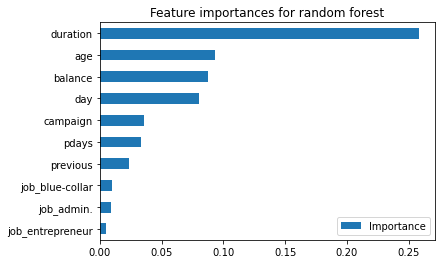

In [53]:
RF_importances = pd.DataFrame(data = RF.feature_importances_,index = X_valid.columns, columns=['Importance'])
RF_importances[:10].sort_values(by='Importance').plot.barh()
plt.title('Feature importances for random forest')
plt.show()

In [54]:
RF_importances[:10].sort_values(by='Importance').index.values

array(['job_entrepreneur', 'job_admin.', 'job_blue-collar', 'previous',
       'pdays', 'campaign', 'day', 'balance', 'age', 'duration'],
      dtype=object)

## Using Feature Importances to Train the Model

## Train and Test the models

In [55]:
X_train2 = X_train[['job_entrepreneur', 'job_admin.', 'job_blue-collar', 'previous',
       'campaign', 'pdays', 'day', 'age', 'balance', 'duration']]
X_train2.head(5)

,job_entrepreneur,job_admin.,job_blue-collar,previous,campaign,pdays,day,age,balance,duration
1625,0,0,0,1,1,316,7,36,1746,15
2054,0,0,0,0,2,-1,30,57,0,104
4011,0,0,0,0,1,-1,2,41,1602,142
4035,0,0,0,0,1,-1,10,47,2246,330
592,0,0,0,0,7,-1,13,41,108,83


In [56]:
X_valid2 = X_valid[['job_entrepreneur', 'job_admin.', 'job_blue-collar', 'previous',
       'campaign', 'pdays', 'day', 'age', 'balance', 'duration']]

In [57]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
RF.fit(X_train2,y_train)
pred2 = RF.predict(X_valid2)

In [58]:
RF.fit(X_train2,y_train)
pred2 = RF.predict(X_valid2)

print(accuracy_score(pred2,y_valid))

0.8739635157545605


In [59]:
# Precision score

p_positive = precision_score(pred2, y_valid, pos_label=1)
print(p_positive)

p_negative = precision_score(pred2, y_valid, pos_label=0)
print(p_negative)

0.22566371681415928
0.9665192672141504


In [60]:
# recall score

r_positive = recall_score(pred2, y_valid, pos_label=1)
print(r_positive)

r_negative = recall_score(pred2, y_valid, pos_label=0)
print(r_negative)

0.49038461538461536
0.8973607038123167


## Evaluation and Cross-Validation

In [61]:
# Model cross-validation using k-fold
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression

cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [62]:
def trainer_mcv(model,X,y):
    #evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy: %.3f' % (mean(scores)))

In [63]:
# train and predict
for model in models:
    trainer_mcv(model,X_train2,y_train)

Accuracy: 0.890
Accuracy: 0.881
Accuracy: 0.860
Accuracy: 0.890


In [64]:
# Generate the classification report


print(classification_report(pred2, y_valid))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1705
           1       0.23      0.49      0.31       104

    accuracy                           0.87      1809
   macro avg       0.60      0.69      0.62      1809
weighted avg       0.92      0.87      0.89      1809



## Summary



Looking at the performances of the models we can see that RandomForest and LogisticRegression perform excellently than others and RandomForest having a slight increase of 0.001 above LogisticRegression. 
RandomForest with it slight increase above LogisticRegression maintained an accuracy score between 85% and 89% which is a strong score

Further evaluation was conducted which is testing through precision and recall. The precision score accuracy reveals that 
from the 1809 data used for test,97% are negative(those that wont subscribe to the product) and 23% are 
positive(those that will subscibe). Recall score accuracy on the other hand shows that 90% will not subscribe(negative) 
and 49% will subscribe(positive).
Evaluation and Cross-Validation(cv) also confirm the durability of RandomForest model by having 89% accuracy above others.
With RandomForest model having highest accuracy it is recommended to be deployed for production.
Nevertheless in an event another model is needed,LogisticRegression which is always having a close accuracy figure with 
RandomForest is recommended

The prediction exercise also reveals the type of customers that may not accept the new product. This can help streamline the 
focus of the bank on those that will likely subscribe to the new product and maximize their marketing ability.

Thank you
